# **Laboratorio 2: Reducción de dimensionalidad**
**José Barrios - 20007192**

## Instrucciones generales
Usando el dataset de fashion MNIST realizar:
* PCA sin sklearn para reducir a 2 dimensiones.
    * Anotar la cantidad de varianza preservada.
* t-sne con sklearn para reducir a 2 dimensiones.
* Analizar ambas representaciones, comparar y concluir.
* Aplicar clustering con sklearn sobre la representación reducida.
* Ya que este dataset si posee etiquetas “y” (razas) analizar si los clusters encontrados tienden a agrupar la misma prenda o prendas similares.
* Agregar conclusiones finales.


In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from sklearn.cluster import KMeans

## Data MNIST
El set de datos de fashion M-NIST de Keras está discribuido en un conjunto de imagenes en escala de grises de 28x28 píxeles. Todas estas imagenes tienen una etiqueta para formar entrenamientos de la forma (x, y).

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #Instancia de fashion
(train_images, train_labels), (_, _) = fashion_mnist.load_data() #Data de entrenamiento 

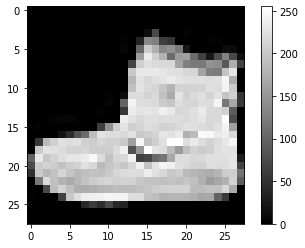

In [3]:
#Imagen de muestra
plt.imshow(train_images[0], cmap = 'gray')
plt.colorbar()

## Implementación PCA
Determinación de los mejores vectores base para la nueva representación de la data. Se implementará sin la función nativa de sklearn.

Como paso previo a definir una función, primero convertimos la data (que está en 3 dimensiones) a una matriz, donde cada fila representará una prenda.

In [4]:
data_images = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2])
data_images.shape

(60000, 784)

In [5]:
def PCAfunction(df):
    #Normalizar datos
    df_norm = StandardScaler().fit_transform(df)

    #Calculo de covarianza, eigenvectores y eigenvalores
    cov_mat = np.cov(df_norm.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    
    varianza_total = np.sum(eig_vals)

    #Lista de igenvalues con su respectivo eigenvector
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Ordernar descendentemente
    eig_pairs.sort()
    eig_pairs.reverse()

    #Matriz de valorespropios y su varianza
    matrix_w = np.hstack((eig_pairs[0][1].reshape(eig_vals.shape[0],1), 
                          eig_pairs[1][1].reshape(eig_vals.shape[0],1)))
    
    #Varianza por par de vectores
    varianza = eig_pairs[0][0] + eig_pairs[1][0]
    
    #Varianza preservada
    varianza_preservada = varianza / varianza_total
    
    #Nuevas dimensiones (2D)
    Y = df_norm.dot(matrix_w)

    #-- Mostrar representacion en 2d
    plt.scatter(Y[:,0], Y[:,1], color='blue', s=2)
    plt.show()
    
    return varianza_preservada, Y

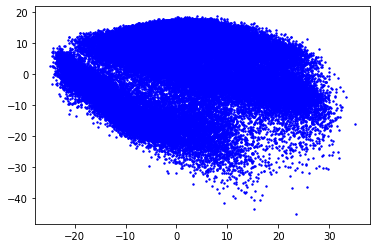

In [6]:
varianza_preservada, salida_pca = PCAfunction(data_images)

In [7]:
varianza_preservada

0.36498179910702233

Crear un set pequeño para las pruebas de los algoritmos, ya que t-SNE puede llegar a tardarse demasiado.

In [8]:
data_images_little = data_images[0:5000, :]
data_labels_little = train_labels[0:5000]

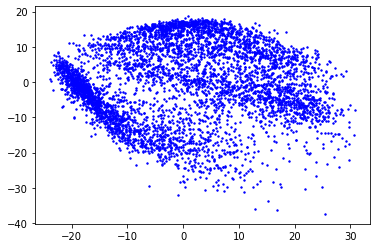

In [9]:
varianza_preservada, salida_pca = PCAfunction(data_images_little)

## t-SNE
Reducción a dos dimensiones con t-SNE de sklearn.

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_images_little)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.288s...
[t-SNE] Computed neighbors for 5000 samples in 37.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 428.844560
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.311081
[t-SNE] KL divergence after 300 iterations: 1.828158


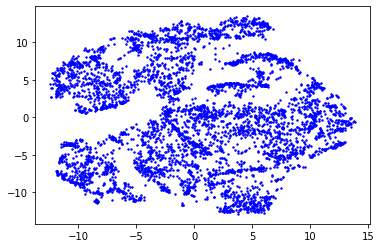

In [12]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], color='blue', s=2)
plt.show()

Notamos que tSNE transforma aun más la data y se notan más separaciones que las que hace PCA. Sin embargo, computacionalmente tSNE es mucho más costoso y por eso se recortó la data, para disminuir el tiempo de ejecución.

## Clusters

In [15]:
def Clusters(df, k=10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(df)
    plt.scatter(df[:,0], df[:,1], c=y_kmeans, cmap='Paired', s=2)

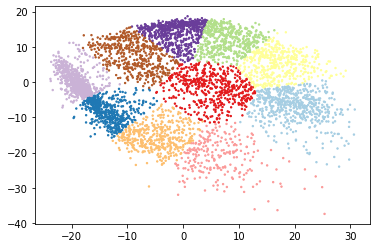

In [16]:
Clusters(salida_pca)

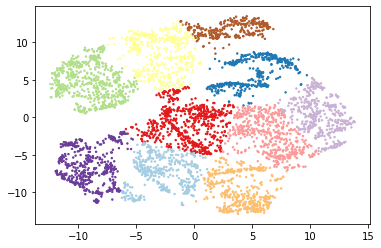

In [17]:
Clusters(tsne_results)

## Agrupación con etiquetas

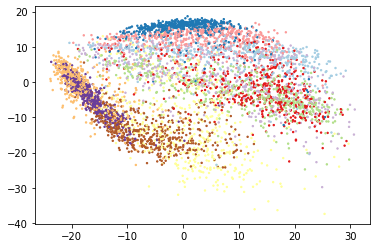

In [19]:
plt.scatter(salida_pca[:,0], salida_pca[:,1], c=data_labels_little, cmap='Paired', s=2)

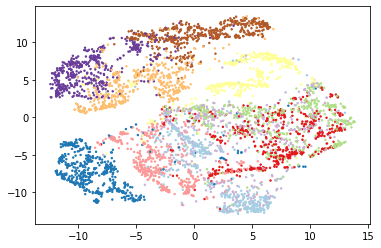

In [20]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=data_labels_little, cmap='Paired', s=2)

## Conclusión
Se observa que tSNE realizó un mejor trabajo de separación de clusters y es mas facil de distinguir los grupos.

Ambos algoritmos resultan en asociaciones diferentes a sus labels respectivos, esto debido a que la data ha sufrido una transformación fuerte para ser mostrada en una sola gráfica de dos dimensiones.